---0---
顔の座標： 98 36 512 512
---10---
顔の座標： 121 72 558 558
---20---
失敗
---30---
失敗
---40---
失敗
---50---
失敗
---60---
失敗
---70---
失敗
---80---
失敗


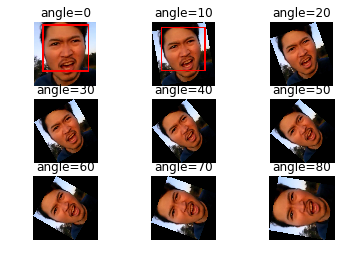

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# カスケードファイルを指定して、検出器を作成
cascade_file = "haarcascade_frontalface_alt.xml"
# カスケード分類器のファイルを読み込む
cascade = cv2.CascadeClassifier(cascade_file)

# 画像を読み込んでグレイスケールに変換
img = cv2.imread("sutehage2.jpg")

def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 顔認識を実行
    # detectMultiScale(画像（CV_８U行列）,minSize(width,height),maxSize(width,height)などのパラメータ)
    face_list = cascade.detectMultiScale(img_gray,minSize =(150,150))

    # 結果を確認
    if len(face_list)  == 0:
        print("失敗")
        quit() # exit

    # 認識した部分にマーク
    for(x,y,w,h) in face_list:
        print("顔の座標：",x,y,w,h)
        # BGR指定
        red = (0, 0,255)
        #  長方形の描画：cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
        cv2.rectangle(img,(x,y),(x + w, y + h), red, thickness = 20)

for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    # ndimage.rotate(画像ファイル,傾ける角度)
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    # subplot(行数,列数,何番目に描画するか)
    # 0-80度に９段階に傾け画像を３＊３に表示する
    plt.subplot(3,3,i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()
